## 📌 Introduction  
This project aims to predict crime rates in San Francisco using historical data.

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("C:/Users/User/Downloads/data/train.csv")

**Dataset**: SF Crime Dataset (878,049 records) with features like Dates, Category, PdDistrict, and coordinates.

In [3]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

✅**No Missing Value in Data**

## Let's Show Info..ℹ️

In [5]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000



***
**Name Columes**:
* count: Number of non-missing values (here, 878,049 for each column).
* mean: Arithmetic average (e.g., -122.422616 for X).
* std: Standard deviation (a measure of dispersion; small values indicate data points are close to the mean).
* min and max: Minimum and maximum values (e.g., -122.513642 to -120.5 for X).
* 25%, 50%, 75%: Quartiles (values at 25%, 50%, and 75% of the sorted data).
***



In [6]:
data["Category"].value_counts().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

*** 
 
* Counts the frequency of each category in the "Category" column and sorts them in descending order.
* Used to understand the distribution of crimes or events in the data (e.g., analyzing San Francisco police data).                                                    

 **The Three Most Types Of Crime :**
* LARCENY/THEFT: 174,900 occurrences (most frequent).
* OTHER OFFENSES: 126,182 occurrences.
* NON-CRIMINAL: 92,304 occurrences.

***


In [7]:
data['DayOfWeek'].value_counts().sort_values(ascending = False)

DayOfWeek
Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: count, dtype: int64

***
The most day to commit crime is Friday..!!
***

In [8]:
data['PdDistrict'].value_counts().sort_values(ascending=False)

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

***
The most area where crime happens is SOUTHERN..!!
***

In [9]:
area_day_count = data[['PdDistrict','DayOfWeek']].value_counts().unstack()
area_day_count

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
PdDistrict,,,,,,,
BAYVIEW,13681,12649,12440,11965,12406,12816,13474
CENTRAL,13397,11130,14067,12197,11633,11289,11747
INGLESIDE,11881,11282,10845,10346,11298,11546,11647
MISSION,18190,16587,17213,15874,17045,17282,17717
NORTHERN,16331,14300,15487,14271,15082,14568,15257
PARK,7610,6945,6913,6646,7047,6871,7281
RICHMOND,6850,6352,6434,6089,6494,6477,6513
SOUTHERN,24458,21184,23277,20810,22527,22013,22913
TARAVAL,10207,9257,9024,8331,9370,9605,9802


In [10]:
area_day_count["MaxCrimeDay"]=area_day_count.idxmax(axis=1)
area_day_count["MaxCrimeDay"]

PdDistrict
BAYVIEW          Friday
CENTRAL        Saturday
INGLESIDE        Friday
MISSION          Friday
NORTHERN         Friday
PARK             Friday
RICHMOND         Friday
SOUTHERN         Friday
TARAVAL          Friday
TENDERLOIN    Wednesday
Name: MaxCrimeDay, dtype: object

***
Show each District Max Crime Day
***

In [11]:

# Compute Max Value
Days_cols = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
area_day_count['MaxCrimeCount'] = area_day_count[Days_cols].max(axis=1)

print(area_day_count['MaxCrimeCount'])

PdDistrict
BAYVIEW       13681
CENTRAL       14067
INGLESIDE     11881
MISSION       18190
NORTHERN      16331
PARK           7610
RICHMOND       6850
SOUTHERN      24458
TARAVAL       10207
TENDERLOIN    12860
Name: MaxCrimeCount, dtype: int64


***
The max crime count in max crime day
***

In [12]:
resultWsort = area_day_count[['MaxCrimeDay','MaxCrimeCount']].sort_values(by="MaxCrimeCount",ascending=False)
resultWsort

DayOfWeek,MaxCrimeDay,MaxCrimeCount
PdDistrict,,
SOUTHERN,Friday,24458
MISSION,Friday,18190
NORTHERN,Friday,16331
CENTRAL,Saturday,14067
BAYVIEW,Friday,13681
TENDERLOIN,Wednesday,12860
INGLESIDE,Friday,11881
TARAVAL,Friday,10207
PARK,Friday,7610


***
Put Data in Data Frame to become organize
***


## Make Data More Clearly..📊

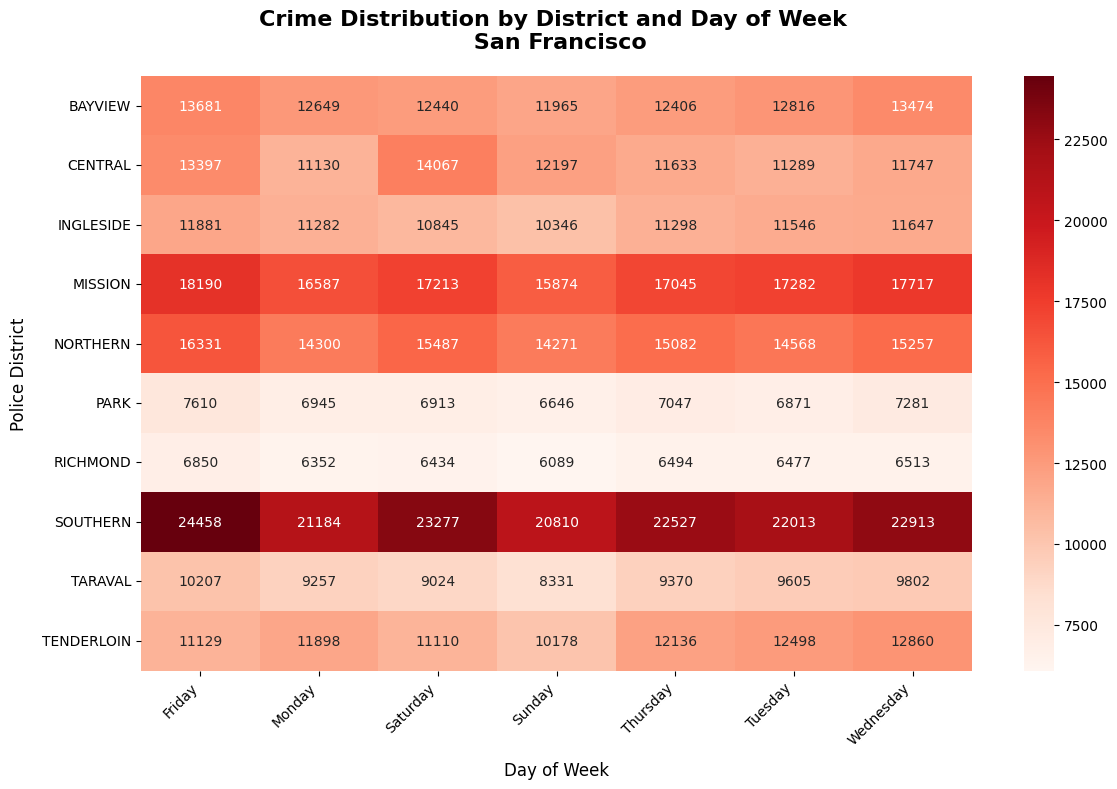

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(area_day_count.drop(['MaxCrimeDay', 'MaxCrimeCount'], axis=1, errors='ignore'),
            annot=True, 
            fmt='.0f', 
            cmap='Reds')
plt.title('Crime Distribution by District and Day of Week \n San Francisco', 
                        fontsize=16, pad=20, weight='bold')
plt.xlabel('Day of Week', fontsize=12, labelpad=10)
plt.ylabel('Police District', fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.grid(False)
plt.tight_layout()

plt.show()